In [23]:
%pylab --no-import-all notebook

Populating the interactive namespace from numpy and matplotlib


In [8]:
import Classification as cl

def aritm(data):
    ar = []
    for i in range(len(data)):
        ar.append(np.mean(data[:i+1]))
    return(np.array(ar))

import os
way = os.getcwd()
way = way + "/Data_npy/"
way1 = way + "Chosen ones/"
X = np.load(way + "Synteticka_data_sum_0.025.npy")

<IPython.core.display.Javascript object>


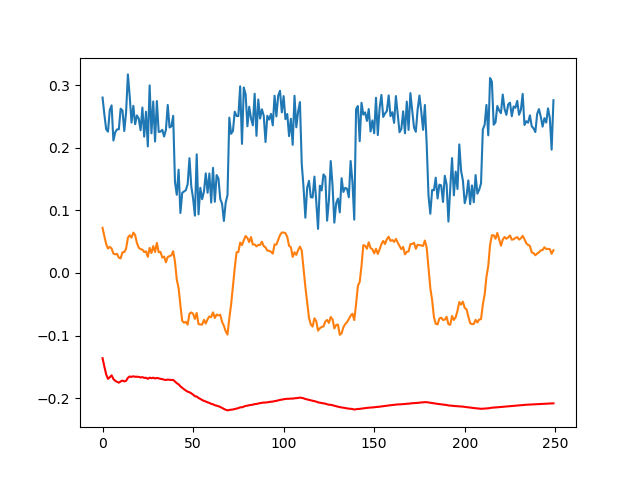

In [4]:


#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
ax = plt.gca()

ax.plot(X, label = 'syntetická data')
ax.plot(cl.Moving_Mean(X,5)-np.mean(X), label = r'$\boldsymbol{\widetilde{X}}$')
#ax.plot([cl.aritmeticky_prumer_fce(X, x, 5) for x in range(len(X))], label = r'$\boldsymbol{\widetilde{X}}$')
ax.plot(aritm(X)-2*np.mean(X), color = "red", label = r'$\boldsymbol{\overline{X}}$')
#ax.plot(aritm(X), color = "red", label = r'$\boldsymbol{\overline{X}}$')
#ax.legend()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [4]:
pylab.plot(X,color = 'purple', label='syntetická data')
#pylab.plot([cl.aritmeticky_prumer_fce(X, x, 5) for x in range(len(X))]-np.mean(X), label='úsekový aritmetický průměr')
pylab.plot([cl.aritmeticky_prumer_fce(X, x, 5) for x in range(len(X))],color = 'yellow', label='úsekový aritmetický průměr')
#pylab.plot(aritm(X)-1.8*np.mean(X), color = "red" , label = "standartní aritmetický průměr")
pylab.plot(aritm(X), color = "red" , label = "standartní aritmetický průměr")
pylab.legend(loc='upper right')
#pylab.ylim(-0.2, 0.48)

<IPython.core.display.Javascript object>


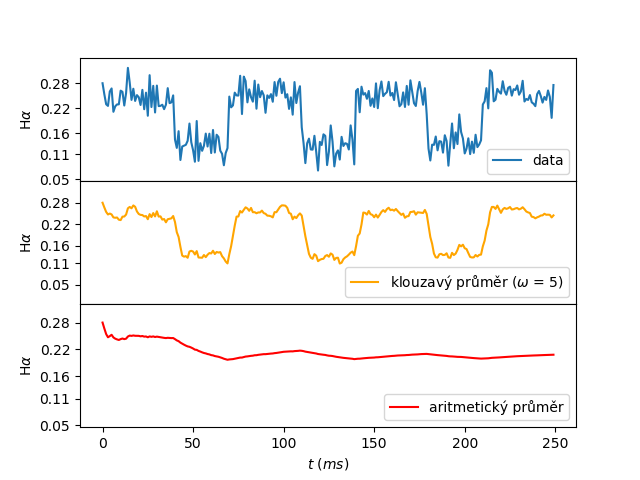

In [42]:
usek  = cl.Moving_Mean(X,5)
ar = aritm(X)

gmax = max([max(X), max(usek), max(ar)])+((max(X)-min(X))/10)
gmin = min([min(X), min(usek), min(ar)])-((max(X)-min(X))/10)

fig, axs = plt.subplots(3,1, sharex = True)
fig.subplots_adjust(hspace = 0)
axs[0].plot(X, label = "data")
axs[0].set_yticks(np.around(np.arange(gmin, gmax,(gmax-gmin)/5), decimals = 2))
axs[0].set_ylim(gmin,gmax)
axs[0].set_ylabel(r'H$\alpha$')
axs[0].legend(loc = "lower right")
axs[1].plot(usek, label = r"klouzavý průměr ($\omega$ = 5)", color = "orange")
axs[1].set_yticks(np.around(np.arange(gmin, gmax,(gmax-gmin)/5), decimals = 2))
axs[1].set_ylim(gmin-0.05,gmax)
axs[1].set_ylabel(r'H$\alpha$')
axs[1].legend(loc = "lower right")
axs[2].plot(ar, label = 'aritmetický průměr', color  = "red")
axs[2].set_yticks(np.around(np.arange(gmin, gmax,(gmax-gmin)/5), decimals = 2))
axs[2].set_ylim(gmin,gmax-0.02)
axs[2].set_ylabel(r'H$\alpha$')
axs[2].set_xlabel(r'$t \ (ms)$')
axs[2].legend(loc = "lower right")
plt.show()

<IPython.core.display.Javascript object>


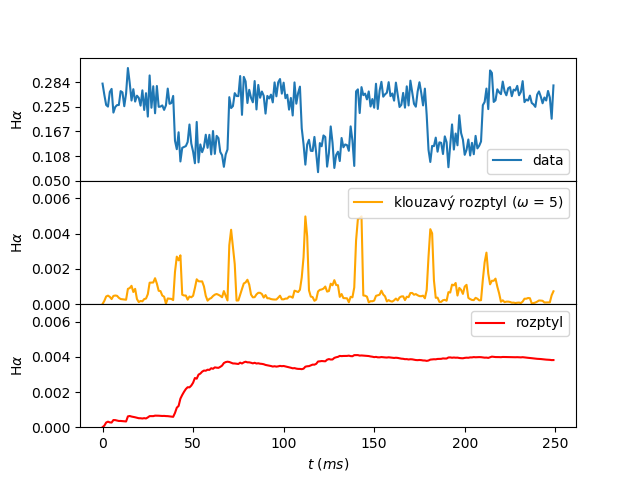

In [40]:
aritmetiky_prumer_od_pocatku = np.cumsum(X) / (np.arange(len(X)) + 1)
Rozpt = cl.rozptyl_od_poc_fce(X, aritmetiky_prumer_od_pocatku)

Rozptyl = cl.Moving_Variance(X, 5)

gmax = max([max(X), max(Rozpt), max(Rozptyl)])+((max(X)-min(X))/10)
gmin = min([min(X), min(Rozpt), min(Rozptyl)])-((max(X)-min(X))/10)

ggmax = 1.6*max([max(Rozpt), max(Rozptyl)])

fig, axs = plt.subplots(3,1, sharex = True)
fig.subplots_adjust(hspace = 0)
axs[0].plot(X, label = "data")
axs[0].set_yticks(np.around(np.arange(0.05, gmax,(gmax-0.05)/5), decimals = 3))
axs[0].set_ylim(0.05,gmax)
axs[0].set_ylabel(r"H$\alpha$")
axs[0].legend(loc = "lower right")
axs[1].plot(Rozptyl, label = "klouzavý rozptyl ($\omega$ = 5)", color = "orange")
axs[1].set_yticks(np.around(np.linspace(0, 0.006, 4), decimals = 4))
axs[1].set_ylim(0,0.007)
axs[1].set_ylabel(r"H$\alpha$")
axs[1].legend(loc = "upper right")
axs[2].plot(Rozpt, label = 'rozptyl', color  = "red")
axs[2].set_yticks(np.around(np.linspace(0, 0.006, 4), decimals = 4))
axs[2].set_ylim(0, 0.007)
axs[2].set_ylabel(r'H$\alpha$')
axs[2].legend(loc = "upper right")
axs[2].set_xlabel(r"$t \ (ms)$")
plt.show()

In [13]:
ggmax = max([max(Rozpt), max(Rozptyl)])
ggmax

0.0049780335327896958

In [5]:
N = np.arange(10)
N

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
np.linspace(-0.001, 0.006, 4)

array([-0.001     ,  0.00133333,  0.00366667,  0.006     ])

<IPython.core.display.Javascript object>


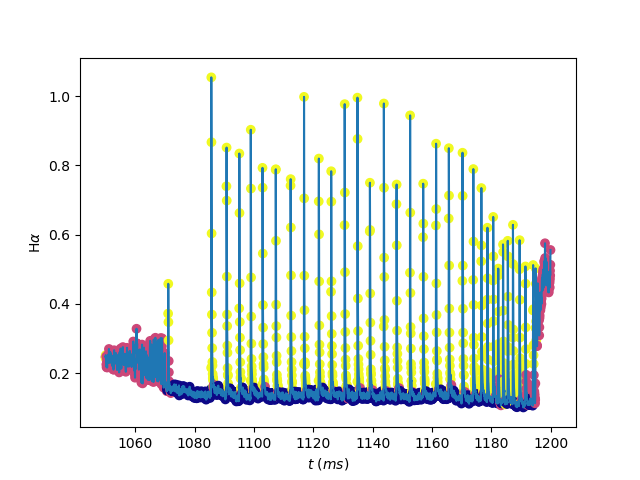

In [9]:
stavy = np.load("stavy.npy")
test_data=np.load(way1 + "No11.npy")
plt.figure("p.1")
plt.plot(test_data[0], test_data[1])
plt.scatter(test_data[0], test_data[1], c = stavy, cmap = plt.cm.plasma)
plt.ylabel(r'H$\alpha$')
plt.xlabel(r'$t \ (ms)$')
plt.show()

In [11]:
tr= np.load(way + "seznam.npy")

<IPython.core.display.Javascript object>


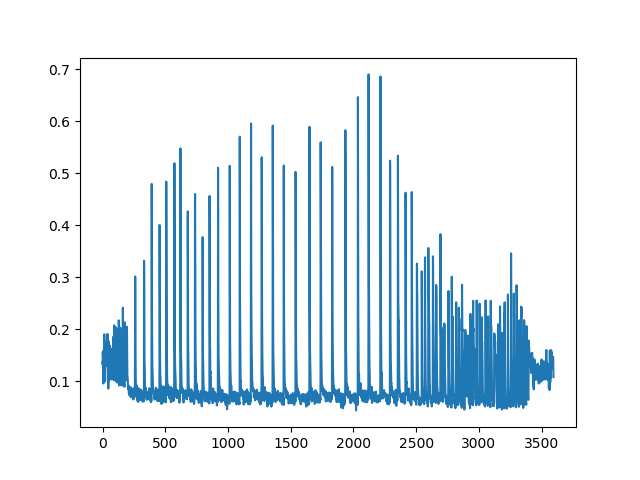

<IPython.core.display.Javascript object>


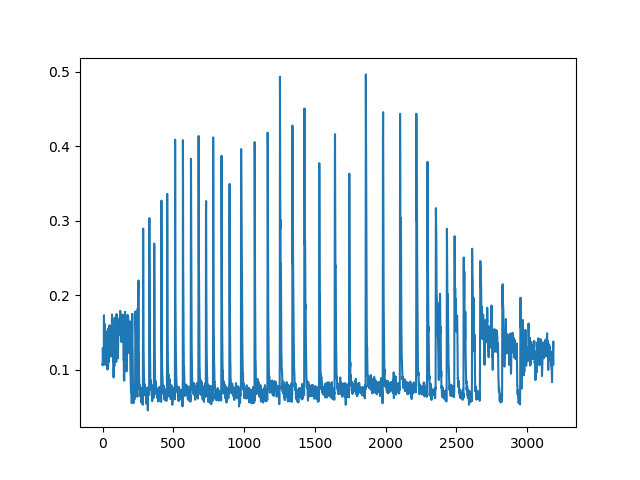

<IPython.core.display.Javascript object>


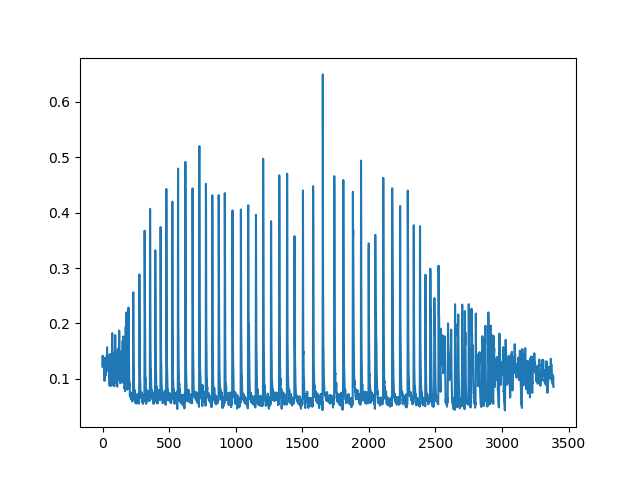

<IPython.core.display.Javascript object>


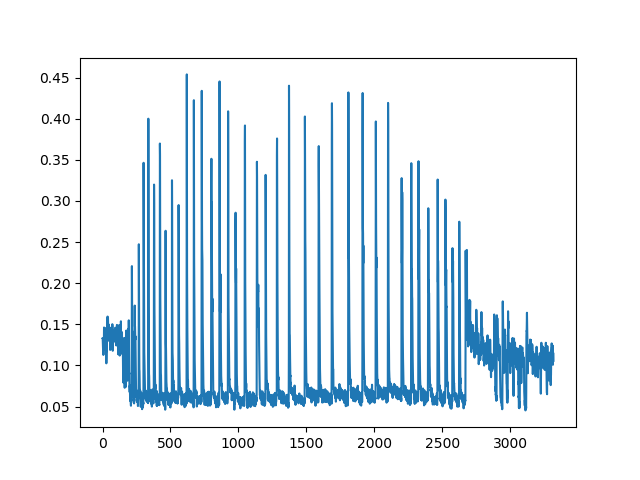

<IPython.core.display.Javascript object>


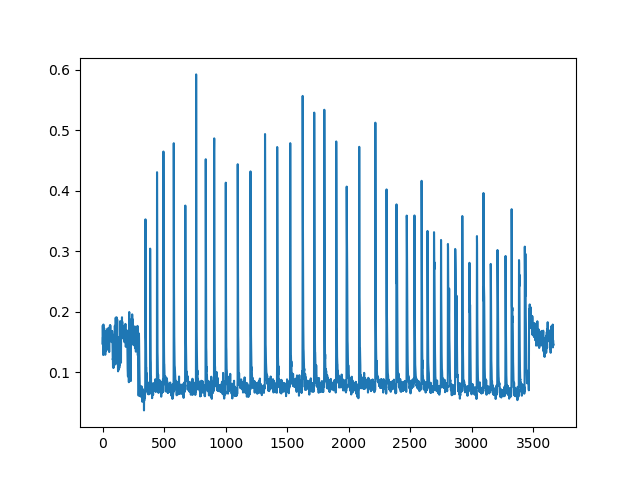

<IPython.core.display.Javascript object>


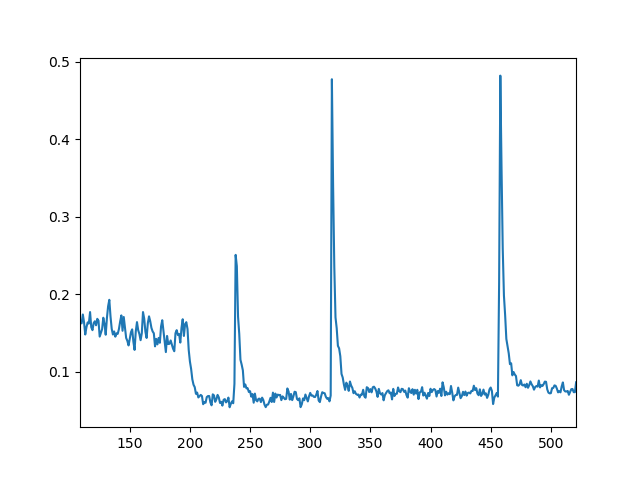

<IPython.core.display.Javascript object>


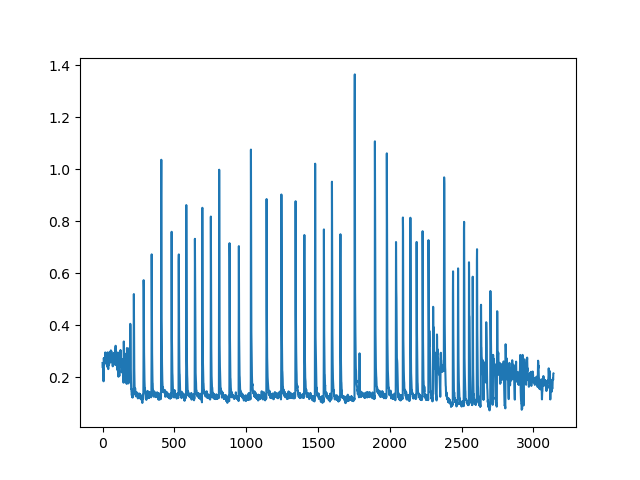

<IPython.core.display.Javascript object>


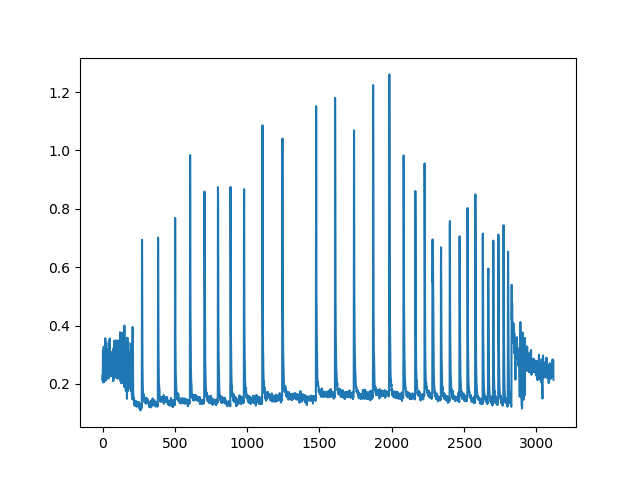

<IPython.core.display.Javascript object>


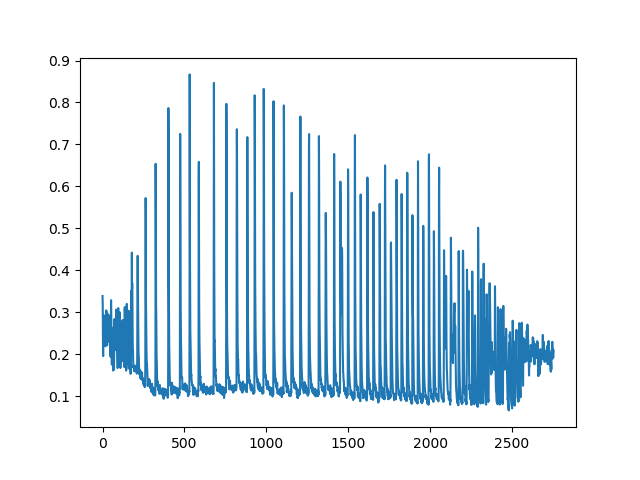

<IPython.core.display.Javascript object>


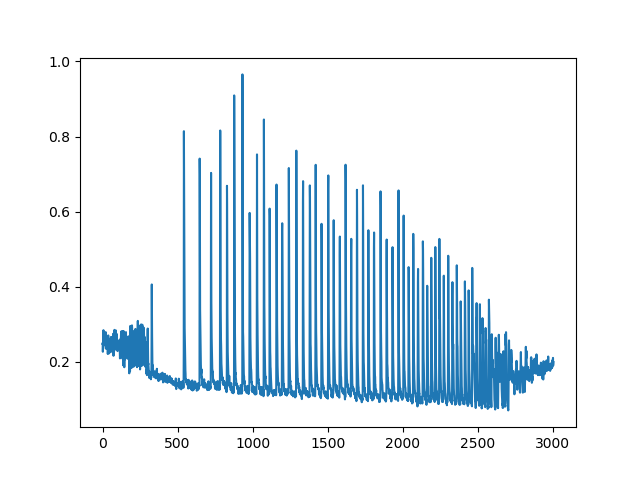

In [14]:
for i in tr:
    plt.figure("No " + str(i))
    plt.plot(np.load(way1+i)[1])
    plt.show()

<IPython.core.display.Javascript object>


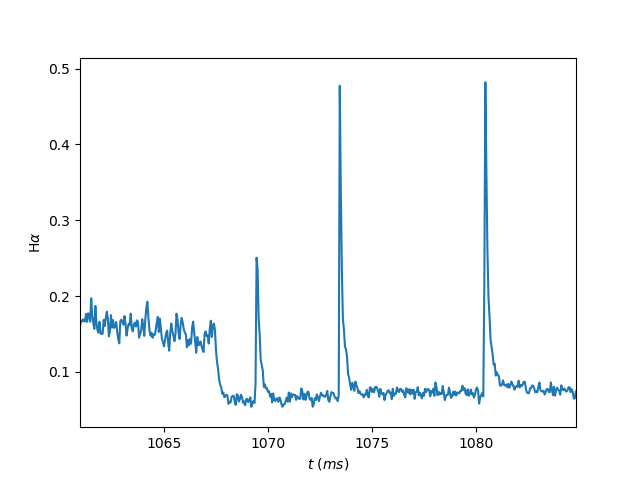

In [18]:
for i in tr:
    if "111" in i:
        plt.figure("idealni ukázka")
        plt.plot(np.load(way1+i)[0],np.load(way1+i)[1])
        plt.ylabel(r'H$\alpha$')
        plt.xlabel(r'$t \ (ms)$')
        plt.show()

<IPython.core.display.Javascript object>


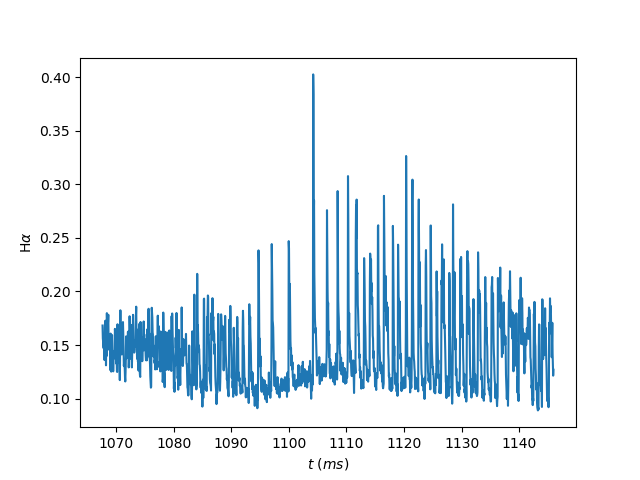

In [20]:
plt.figure("324")
plt.plot(np.load(way1 + "No324.npy")[0], np.load(way1 + "No324.npy")[1])
#plt.scatter(train_data[3][0], train_data[3][1], c = train_data[3][2], cmap = plt.cm.plasma)
plt.ylabel(r'H$\alpha$')
plt.xlabel(r'$t \ (ms)$')
plt.show()

<IPython.core.display.Javascript object>


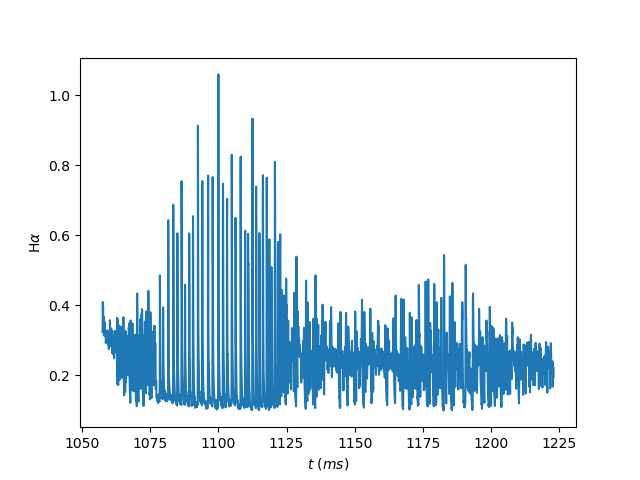

In [22]:

plt.figure("108")
plt.plot(np.load(way1 + "No101.npy")[0], np.load(way1 + "No101.npy")[1])
#plt.scatter(train_data[3][0], train_data[3][1], c = train_data[3][2], cmap = plt.cm.plasma)
plt.ylabel(r'H$\alpha$')
plt.xlabel(r'$t \ (ms)$')
plt.show()

<IPython.core.display.Javascript object>


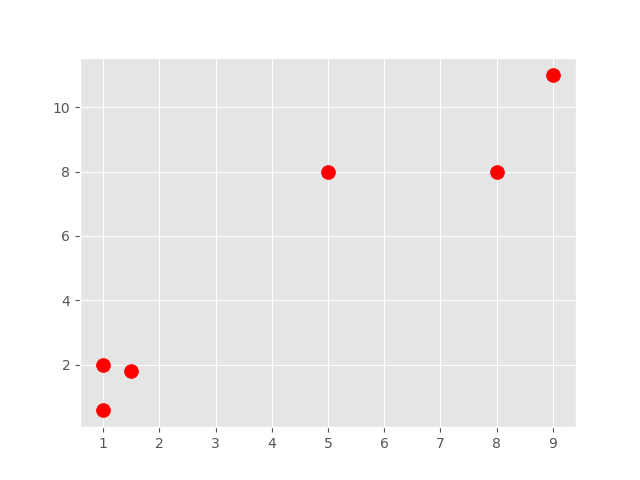

<IPython.core.display.Javascript object>


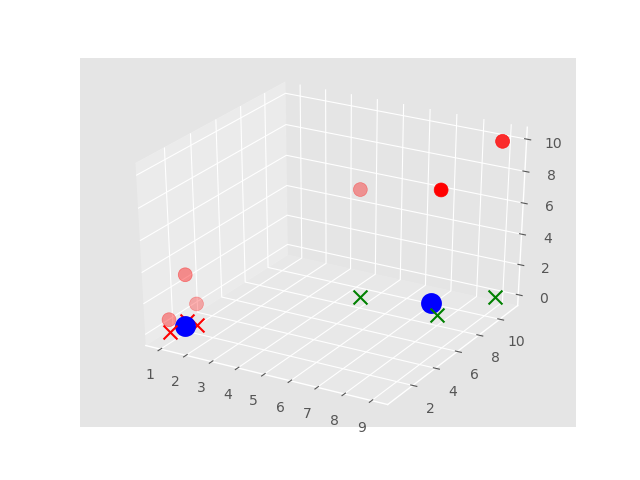

<IPython.core.display.Javascript object>


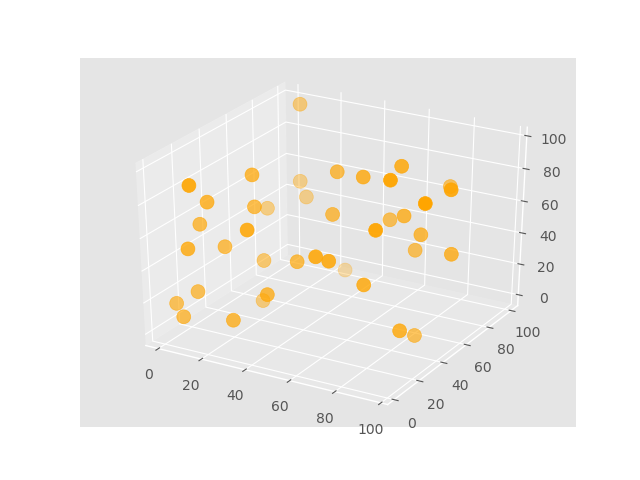

<IPython.core.display.Javascript object>


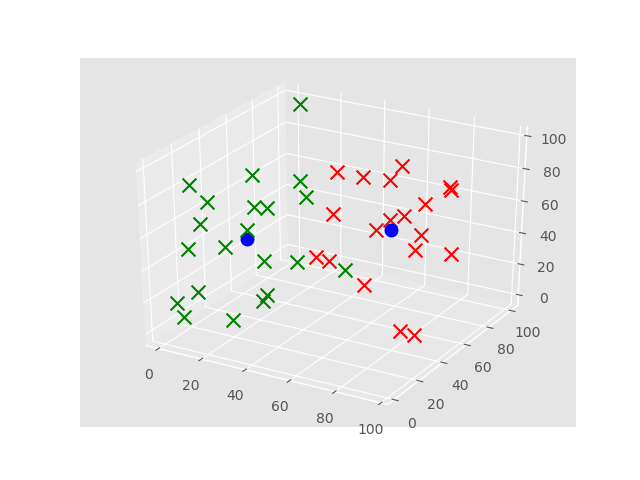

array([[ 0.2803492 ,  0.2803492 ,  0.2803492 ],
       [ 0.26694081,  0.25292335,  0.25353241],
       [ 0.25452624,  0.22831971,  0.2296971 ],
       [ 0.24735497,  0.2105761 ,  0.22584118],
       [ 0.24996581,  0.20369662,  0.26040916],
       [ 0.24746307,  0.20378538,  0.26783548],
       [ 0.23908705,  0.19579563,  0.21165232],
       [ 0.2381062 ,  0.19404787,  0.22479286],
       [ 0.23881968,  0.19385341,  0.22940858],
       [ 0.23265564,  0.18963206,  0.22958898],
       [ 0.23158788,  0.19153735,  0.26249664],
       [ 0.24119209,  0.19932258,  0.2596734 ],
       [ 0.24158855,  0.19819777,  0.22677517],
       [ 0.24709417,  0.20267263,  0.25693664],
       [ 0.26463574,  0.21875073,  0.31729684],
       [ 0.26857405,  0.22231297,  0.2821882 ],
       [ 0.2646957 ,  0.21747109,  0.24028165],
       [ 0.27276093,  0.22236255,  0.2671013 ],
       [ 0.26892174,  0.21733073,  0.23774069],
       [ 0.25580933,  0.2084725 ,  0.25173483],
       [ 0.24870612,  0.20363382,  0.246

In [24]:
import Classification as CL
import K_Means as km
import warnings
import os

way = os.getcwd() + "/Data_npy/"


X = np.load(way + "Synteticka_data_sum_0.025.npy")
Y = CL.Moving_Mean(X,5)

Z = CL.Exp_Moving_Mean(X,5)

XX = np.vstack((Y,Z,X)).T
XX

<IPython.core.display.Javascript object>


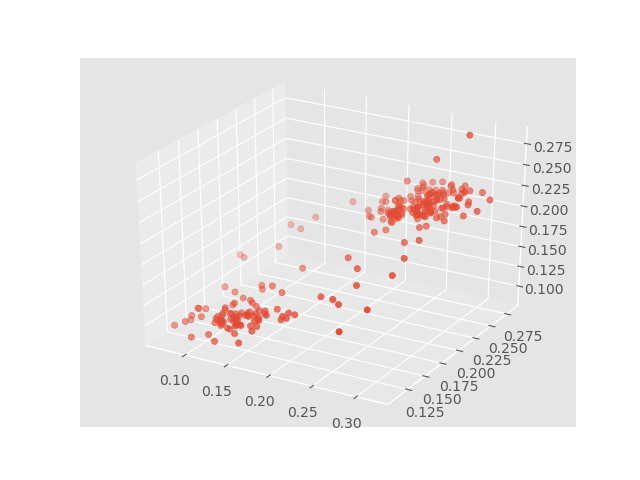

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X,Y,Z)
plt.show()

<IPython.core.display.Javascript object>


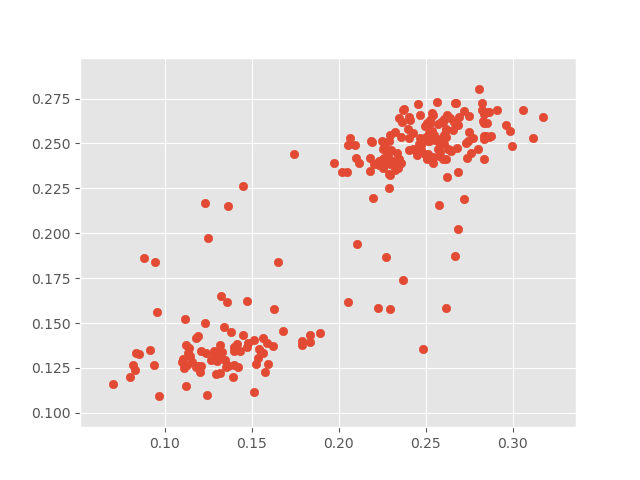

In [28]:
fig = plt.figure()
plt.scatter(X,Y)
plt.show()